In [1]:
pip install tensorflow scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models
import tensorflow as tf

# Load the dataset
data = pd.read_csv('/Users/yanhongzhou/Downloads/preprocessed_dataset.csv')

# Separate features and target
X = data.drop(columns=['Churn'])
y = data['Churn']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the ANN model
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

Epoch 1/20
141/141 [==============================] - 0s 998us/step - loss: 0.5259 - accuracy: 0.7333 - val_loss: 0.4392 - val_accuracy: 0.7764
Epoch 2/20
141/141 [==============================] - 0s 609us/step - loss: 0.4527 - accuracy: 0.7797 - val_loss: 0.4189 - val_accuracy: 0.7906
Epoch 3/20
141/141 [==============================] - 0s 598us/step - loss: 0.4408 - accuracy: 0.7848 - val_loss: 0.4149 - val_accuracy: 0.7995
Epoch 4/20
141/141 [==============================] - 0s 631us/step - loss: 0.4371 - accuracy: 0.7888 - val_loss: 0.4137 - val_accuracy: 0.7968
Epoch 5/20
141/141 [==============================] - 0s 606us/step - loss: 0.4361 - accuracy: 0.7892 - val_loss: 0.4116 - val_accuracy: 0.7968
Epoch 6/20
141/141 [==============================] - 0s 600us/step - loss: 0.4344 - accuracy: 0.7908 - val_loss: 0.4101 - val_accuracy: 0.7941
Epoch 7/20
141/141 [==============================] - 0s 601us/step - loss: 0.4325 - accuracy: 0.7930 - val_loss: 0.4091 - val_accuracy:

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models, regularizers
import tensorflow as tf

# Load the dataset
data = pd.read_csv('/Users/yanhongzhou/Downloads/preprocessed_dataset.csv')

# Separate features and target
X = data.drop(columns=['Churn'])
y = data['Churn']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the optimized ANN model
model = models.Sequential()

# First hidden layer with L2 regularization and dropout
model.add(layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],),
                       kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.3))  # Dropout layer to prevent overfitting

# Second hidden layer
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.3))  # Dropout layer to prevent overfitting

# Output layer
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model with a learning rate scheduler
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with more epochs
history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

Epoch 1/30
141/141 [==============================] - 0s 1ms/step - loss: 0.5757 - accuracy: 0.7273 - val_loss: 0.4815 - val_accuracy: 0.7941
Epoch 2/30
141/141 [==============================] - 0s 678us/step - loss: 0.5088 - accuracy: 0.7728 - val_loss: 0.4692 - val_accuracy: 0.7924
Epoch 3/30
141/141 [==============================] - 0s 647us/step - loss: 0.5000 - accuracy: 0.7786 - val_loss: 0.4621 - val_accuracy: 0.7986
Epoch 4/30
141/141 [==============================] - 0s 653us/step - loss: 0.4889 - accuracy: 0.7790 - val_loss: 0.4565 - val_accuracy: 0.8012
Epoch 5/30
141/141 [==============================] - 0s 666us/step - loss: 0.4865 - accuracy: 0.7859 - val_loss: 0.4507 - val_accuracy: 0.7995
Epoch 6/30
141/141 [==============================] - 0s 680us/step - loss: 0.4795 - accuracy: 0.7872 - val_loss: 0.4466 - val_accuracy: 0.7977
Epoch 7/30
141/141 [==============================] - 0s 645us/step - loss: 0.4745 - accuracy: 0.7901 - val_loss: 0.4441 - val_accuracy: 0

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
data = pd.read_csv('/Users/yanhongzhou/Downloads/preprocessed_dataset.csv')

# Separate features and target
X = data.drop(columns=['Churn'])
y = data['Churn']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the optimized ANN model
model = models.Sequential()

# First hidden layer with L2 regularization and dropout
model.add(layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],),
                       kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.3))

# Second hidden layer
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.3))

# Output layer
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, 
                    validation_split=0.2, verbose=1, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

Epoch 1/30
141/141 [==============================] - 0s 999us/step - loss: 0.5582 - accuracy: 0.7324 - val_loss: 0.4790 - val_accuracy: 0.7986
Epoch 2/30
141/141 [==============================] - 0s 675us/step - loss: 0.5091 - accuracy: 0.7797 - val_loss: 0.4636 - val_accuracy: 0.7941
Epoch 3/30
141/141 [==============================] - 0s 660us/step - loss: 0.4973 - accuracy: 0.7783 - val_loss: 0.4557 - val_accuracy: 0.7986
Epoch 4/30
141/141 [==============================] - 0s 647us/step - loss: 0.4917 - accuracy: 0.7803 - val_loss: 0.4519 - val_accuracy: 0.8012
Epoch 5/30
141/141 [==============================] - 0s 667us/step - loss: 0.4843 - accuracy: 0.7899 - val_loss: 0.4463 - val_accuracy: 0.7977
Epoch 6/30
141/141 [==============================] - 0s 661us/step - loss: 0.4799 - accuracy: 0.7841 - val_loss: 0.4447 - val_accuracy: 0.7986
Epoch 7/30
141/141 [==============================] - 0s 640us/step - loss: 0.4728 - accuracy: 0.7908 - val_loss: 0.4391 - val_accuracy:

In [8]:
pip install keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models, regularizers
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch

# Load the dataset
data = pd.read_csv('/Users/yanhongzhou/Downloads/preprocessed_dataset.csv')

# Separate features and target
X = data.drop(columns=['Churn'])
y = data['Churn']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a hypermodel class that includes the search space for hyperparameters
def build_model(hp):
    model = models.Sequential()

    # First hidden layer (Tune the number of neurons and dropout rate)
    model.add(layers.Dense(units=hp.Int('units_1', min_value=32, max_value=128, step=32), 
                           activation='relu', input_shape=(X_train_scaled.shape[1],),
                           kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))

    # Second hidden layer
    model.add(layers.Dense(units=hp.Int('units_2', min_value=16, max_value=64, step=16), 
                           activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))

    # Output layer
    model.add(layers.Dense(1, activation='sigmoid'))

    # Compile the model with a tunable learning rate
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Float('learning_rate', 
                                                                           min_value=1e-4, max_value=1e-2, sampling='log')),
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Set up the tuner with RandomSearch
tuner = RandomSearch(build_model,
                     objective='val_accuracy',
                     max_trials=10,  # Number of hyperparameter combinations to try
                     executions_per_trial=2,  # Number of times to train each model
                     directory='my_dir',
                     project_name='churn_prediction')

# Perform the hyperparameter search
tuner.search(X_train_scaled, y_train, epochs=20, validation_split=0.2)

# Retrieve the best model and hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print(f"The best hyperparameters are: {best_hps}")

# Evaluate the best model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

Trial 10 Complete [00h 00m 05s]
val_accuracy: 0.8034605383872986

Best val_accuracy So Far: 0.8065661191940308
Total elapsed time: 00h 00m 47s


The best hyperparameters are: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x304ea8650>
45/45 [==============================] - 0s 468us/step - loss: 0.4197 - accuracy: 0.8027
Test Loss: 0.4196590185165405, Test Accuracy: 0.802696943283081


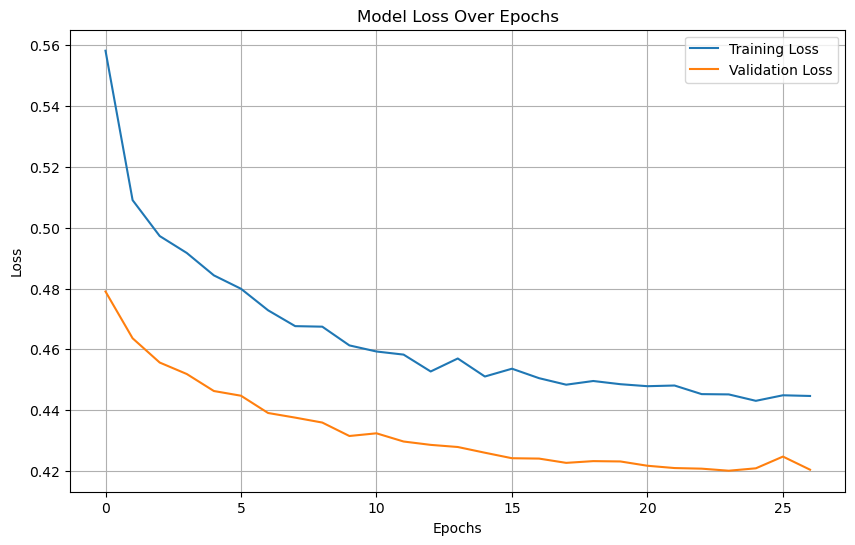

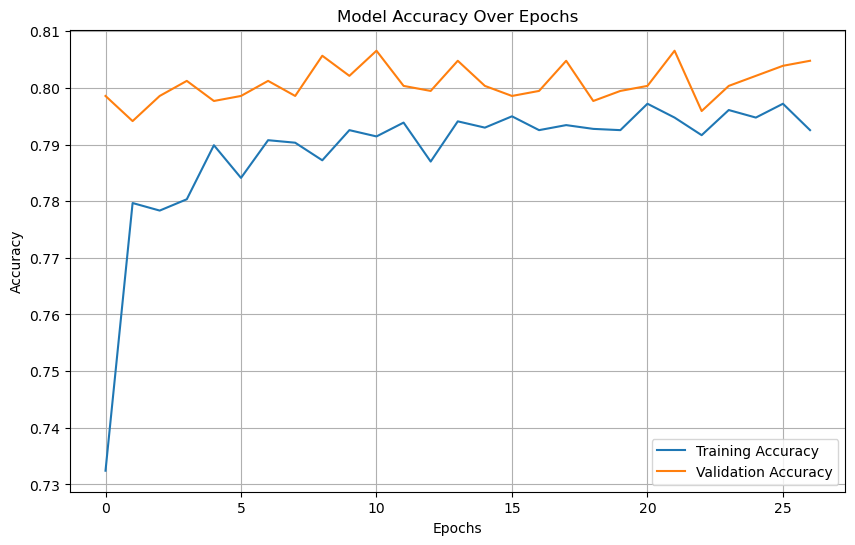

45/45 [==============================] - 0s 441us/step


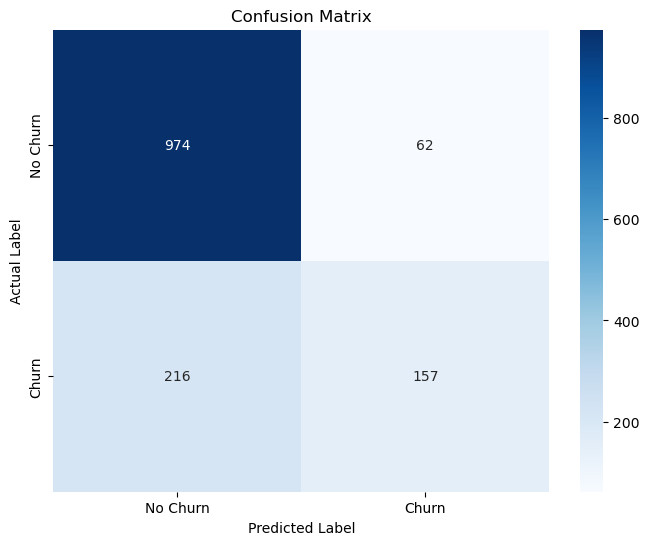

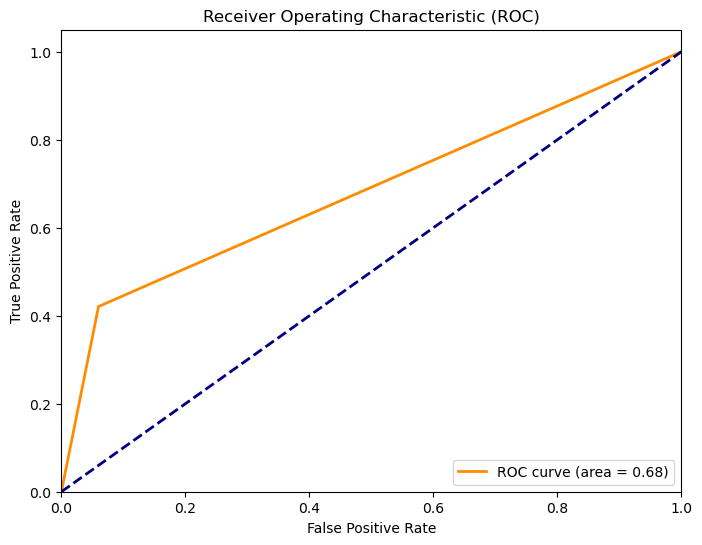

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import numpy as np

# Assuming 'history' is the result from model training

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Confusion Matrix
y_pred = (best_model.predict(X_test_scaled) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()